In [53]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
url='/Users/b4435242/Desktop/作業/Machine_Learning/nctu_ML/toy.csv'
df = pd.read_csv(url)
df=shuffle(df)

y = df.category
X = df.words

In [42]:
words_processed = [ ]
for i in df.words:
    words_processed.append(i)
X = [str(i) for i in words_processed]
print(X[:10])

["['服', '服飾', '服飾售', '服飾售全', '飾', '飾售', '飾售全', '飾售全國', '售', '售全', '售全國', '售全國短', '全', '全國', '全國短', '全國短袖', '國', '國短', '國短袖', '國短袖作', '短', '短袖', '短袖作', '短袖作者', '袖', '袖作', '袖作者', '袖作者看', '作', '作者', '作者看', '作者看板', '者', '者看', '者看板', '者看板標', '看', '看板', '看板標', '看板標題', '板', '板標', '板標題', '板標題服', '標', '標題', '標題服', '標題服飾', '題', '題服', '題服飾', '題服飾售', '服', '服飾', '服飾售', '服飾售全', '飾', '飾售', '飾售全', '飾售全國', '售', '售全', '售全國', '售全國短', '全', '全國', '全國短', '全國短袖', '國', '國短', '國短袖', '國短袖時', '短', '短袖', '短袖時', '短袖時間', '袖', '袖時', '袖時間', '袖時間作', '時', '時間', '時間作', '時間作者', '間', '間作', '間作者', '間作者看', '作', '作者', '作者看', '作者看板', '者', '者看', '者看板', '者看板標', '看', '看板', '看板標', '看板標題', '板', '板標', '板標題', '板標題服', '標', '標題', '標題服', '標題服飾', '題', '題服', '題服飾', '題服飾售', '服', '服飾', '服飾售', '服飾售全', '飾', '飾售', '飾售全', '飾售全國', '售', '售全', '售全國', '售全國短', '全', '全國', '全國短', '全國短袖', '國', '國短', '國短袖', '國短袖時', '短', '短袖', '短袖時', '短袖時間', '袖', '袖時', '袖時間', '袖時間商', '時', '時間', '時間商', '時間商品', '間', '間商', '間商品', '間商品名', '商', '商品', '商品名', '商品名稱', '品', '品名'

In [43]:
le=LabelEncoder()
le.fit(df['category'].drop_duplicates(keep='first'))

y_encoder=[]
y_encoder=le.transform(y)


X_encoder=[]
vectorizer = CountVectorizer()
X_encoder = vectorizer.fit_transform(X)

In [52]:
print(y[0:2])
print(y_encoder[0:2])
print(le.inverse_transform(y_encoder[0:2]))

1696         forsale
2108    TW_Entertain
Name: category, dtype: object
[109  86]
['forsale' 'TW_Entertain']


In [51]:
print(X[0:2])
print(X_encoder[0:2])
print(vectorizer.inverse_transform(X_encoder[0:2]))

["['服', '服飾', '服飾售', '服飾售全', '飾', '飾售', '飾售全', '飾售全國', '售', '售全', '售全國', '售全國短', '全', '全國', '全國短', '全國短袖', '國', '國短', '國短袖', '國短袖作', '短', '短袖', '短袖作', '短袖作者', '袖', '袖作', '袖作者', '袖作者看', '作', '作者', '作者看', '作者看板', '者', '者看', '者看板', '者看板標', '看', '看板', '看板標', '看板標題', '板', '板標', '板標題', '板標題服', '標', '標題', '標題服', '標題服飾', '題', '題服', '題服飾', '題服飾售', '服', '服飾', '服飾售', '服飾售全', '飾', '飾售', '飾售全', '飾售全國', '售', '售全', '售全國', '售全國短', '全', '全國', '全國短', '全國短袖', '國', '國短', '國短袖', '國短袖時', '短', '短袖', '短袖時', '短袖時間', '袖', '袖時', '袖時間', '袖時間作', '時', '時間', '時間作', '時間作者', '間', '間作', '間作者', '間作者看', '作', '作者', '作者看', '作者看板', '者', '者看', '者看板', '者看板標', '看', '看板', '看板標', '看板標題', '板', '板標', '板標題', '板標題服', '標', '標題', '標題服', '標題服飾', '題', '題服', '題服飾', '題服飾售', '服', '服飾', '服飾售', '服飾售全', '飾', '飾售', '飾售全', '飾售全國', '售', '售全', '售全國', '售全國短', '全', '全國', '全國短', '全國短袖', '國', '國短', '國短袖', '國短袖時', '短', '短袖', '短袖時', '短袖時間', '袖', '袖時', '袖時間', '袖時間商', '時', '時間', '時間商', '時間商品', '間', '間商', '間商品', '間商品名', '商', '商品', '商品名', '商品名稱', '品', '品名'

[array(['公斤', '重公斤', '重公', '體重公斤', '體重公', '體重', '分體重公', '分體重', '分體',
       '公分體重', '公分體', '公分', '高公分體', '高公分', '高公', '身高公分', '身高公', '身高',
       '議身高公', '議身高', '議身', '建議身高', '建議身', '建議', '號建議身', '號建議', '號建',
       '國號建議', '國號建', '國號', '美國號建', '美國號', '美國', '貨美國號', '貨美國', '貨美',
       '退貨美國', '退貨美', '退貨', '證退貨美', '證退貨', '證退', '保證退貨', '保證退', '保證',
       '冒保證退', '冒保證', '冒保', '仿冒保證', '仿冒保', '仿冒', '為仿冒保', '為仿冒', '為仿',
       '如為仿冒', '如為仿', '如為', '款如為仿', '款如為', '款如', '二款如為', '二款如', '二款',
       '第二款如', '第二款', '第二', '款第二款', '款第二', '款第', '一款第二', '一款第', '一款',
       '第一款第', '第一款', '第一', '下第一款', '下第一', '下第', '詳下第一', '詳下第', '詳下',
       '請詳下第', '請詳下', '請詳', '址請詳下', '址請詳', '址請', '網址請詳', '網址請', '網址',
       '款網址請', '款網址', '款網', '兩款網址', '兩款網', '兩款', '有兩款網', '有兩款', '有兩',
       '共有兩款', '共有兩', '共有', '明共有兩', '明共有', '明共', '說明共有', '說明共', '說明',
       '他說明共', '他說明', '他說', '其他說明', '其他說', '其他', '標其他說', '標其他', '標其',
       '下標其他', '下標其', '拍下標其', '信網拍下', '信網拍', '信網', '內信網拍', '內信網', '內信',
       '站內信網', '站內信

In [ ]:
'''all_unique_words = vectorizer.get_feature_names()
all_unique_classes =[]
for i in y:
    if i not in all_unique_classes:
        all_unique_classes.append(i)'''

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X_encoder.toarray() , y_encoder, test_size=0.3, random_state=42)

In [47]:
test_size=int (0.3*df['category'].count())
X_train, X_test, y_train, y_test = X_encoder[test_size:], X_encoder[:test_size], y_encoder[test_size:], y_encoder[:test_size] 

In [48]:
neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [49]:
#y_predict=neigh.predict(X_test)
#print (accuracy_score(y_test, y_predict, normalize=False))
metrics.accuracy_score(y_test, neigh.predict(X_test))

0.02766798418972332

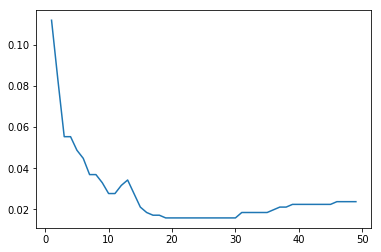

k for max acc: 0 
Max acc: 0.11198945981554677


In [50]:
num_of_neighbor = [i for i in range(1,50)]
acc = []
for i in num_of_neighbor:
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, y_train)
    acc.append(metrics.accuracy_score(y_test, neigh.predict(X_test)))
    
plt.plot(num_of_neighbor,acc)
plt.show()
print('k for max acc:',acc.index(max(acc)),'\nMax acc:',max(acc))